# Problema de Negocio
En una planta de flotación minera, se realiza un proceso para concentrar el mineral de hierro. Durante este proceso, una de las impurezas más relevantes a monitorear es el contenido de sílice en el concentrado final. Sin embargo, la medición del porcentaje de sílice es un proceso que se realiza en el laboratorio y puede demorar aproximadamente una hora en proporcionar resultados. Durante este tiempo, es posible que las condiciones del proceso hayan cambiado, lo que podría llevar a una menor eficiencia en la planta o a un producto con calidad inconsistente.

# Importancia de la Predicción
Si se pudiera predecir con precisión el porcentaje de sílice en tiempo real o con suficiente anticipación, los ingenieros de la planta podrían ajustar las condiciones operativas del proceso de flotación para minimizar la impureza del concentrado final de manera proactiva. Esto permitiría:

Optimizar la calidad del producto final: Manteniendo un contenido bajo de sílice para cumplir con los estándares de calidad del mercado.
Reducir los costos operativos: Minimizar el uso de reactivos o energía utilizados en el proceso de corrección de las condiciones de flotación.
Incrementar la eficiencia del proceso: Haciendo ajustes oportunos que mantengan el proceso en condiciones óptimas sin esperar los resultados del laboratorio.

# Objetivo
El objetivo principal para este problema de negocio es desarrollar un modelo predictivo que permita estimar el porcentaje de sílice en el concentrado de mineral de hierro al final del proceso de flotación, antes de que se disponga la medición de laboratorio.

# Importando librerias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
import json
from datetime import datetime
import ast
pd.set_option('display.max_columns', None)

# Lectura dataset

In [ ]:
## ruta del dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

df = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
display(df)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786","299,163","299,92","299,623","346,794","313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879","299,487","299,71","300,465","330,023","236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397","299,487","299,927","299,707","329,59","225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959","298,045","299,372","298,819","351,453","308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


# Exploracion del dataset

In [ ]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [ ]:
df.shape

(737453, 24)

In [ ]:
print("\nDescripción estadística:")
print(df.describe(include='all'))


Descripción estadística:
                       date % Iron Feed % Silica Feed Starch Flow Amina Flow  \
count                737453      737453        737453      737453     737453   
unique                 4097         278           293      409317     319416   
top     2017-06-16 15:00:00       64,03          6,26      2562,5    534,668   
freq                    180      142560        142560         690        959   

       Ore Pulp Flow Ore Pulp pH Ore Pulp Density  \
count         737453      737453           737453   
unique        180189      131143           105805   
top          402,246     10,0591             1,75   
freq            1735        1509             3214   

       Flotation Column 01 Air Flow Flotation Column 02 Air Flow  \
count                        737453                       737453   
unique                        43675                        80442   
top                         299,927                      255,322   
freq                          13683

In [ ]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


In [ ]:
# Análisis de valores únicos para variables categóricas
print("\nValores únicos por cada columna categórica:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


Valores únicos por cada columna categórica:
date: 4097 valores únicos
% Iron Feed: 278 valores únicos
% Silica Feed: 293 valores únicos
Starch Flow: 409317 valores únicos
Amina Flow: 319416 valores únicos
Ore Pulp Flow: 180189 valores únicos
Ore Pulp pH: 131143 valores únicos
Ore Pulp Density: 105805 valores únicos
Flotation Column 01 Air Flow: 43675 valores únicos
Flotation Column 02 Air Flow: 80442 valores únicos
Flotation Column 03 Air Flow: 40630 valores únicos
Flotation Column 04 Air Flow: 196006 valores únicos
Flotation Column 05 Air Flow: 194711 valores únicos
Flotation Column 06 Air Flow: 90548 valores únicos
Flotation Column 07 Air Flow: 86819 valores únicos
Flotation Column 01 Level: 299573 valores únicos
Flotation Column 02 Level: 331189 valores únicos
Flotation Column 03 Level: 322315 valores únicos
Flotation Column 04 Level: 309264 valores únicos
Flotation Column 05 Level: 276051 valores únicos
Flotation Column 06 Level: 301502 valores únicos
Flotation Column 07 Level: 29

# Limpieza y manipulacion de datos

In [ ]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235","250,576","295,096","306,4","250,225","250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532","250,862","295,096","306,4","250,137","248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874","250,313","295,096","306,4","251,345","248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487","250,049","295,096","306,4","250,422","251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136","249,895","295,096","306,4","249,983","248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"


In [ ]:
# reemplazando las comas por puntos

def remplazar_coma_por_punto(df, exclude_columns=[]):
    # Crea una copia del DataFrame para evitar modificar el original
    df_copy = df.copy()

    # Itera por las columnas y convierte a float si no están en la lista de exclusión
    for col in df_copy.columns:
        if col not in exclude_columns:
            # Reemplaza comas por puntos y convierte a float en las columnas que no están excluidas
            df_copy[col] = df_copy[col].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)

    return df_copy

In [ ]:
df = remplazar_coma_por_punto(df, exclude_columns=['date'])
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
def cast_to_float(df, exclude_columns=[]):
    # Crea una copia del DataFrame para evitar modificar el original
    df_copy = df.copy()

    # Itera por las columnas y convierte a float si no están en la lista de exclusión
    for col in df_copy.columns:
        if col not in exclude_columns:
            df_copy[col] = df_copy[col].astype(float)

    return df_copy

In [ ]:
df = cast_to_float(df, exclude_columns=['date'])
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [ ]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64


# Análisis exploratorio

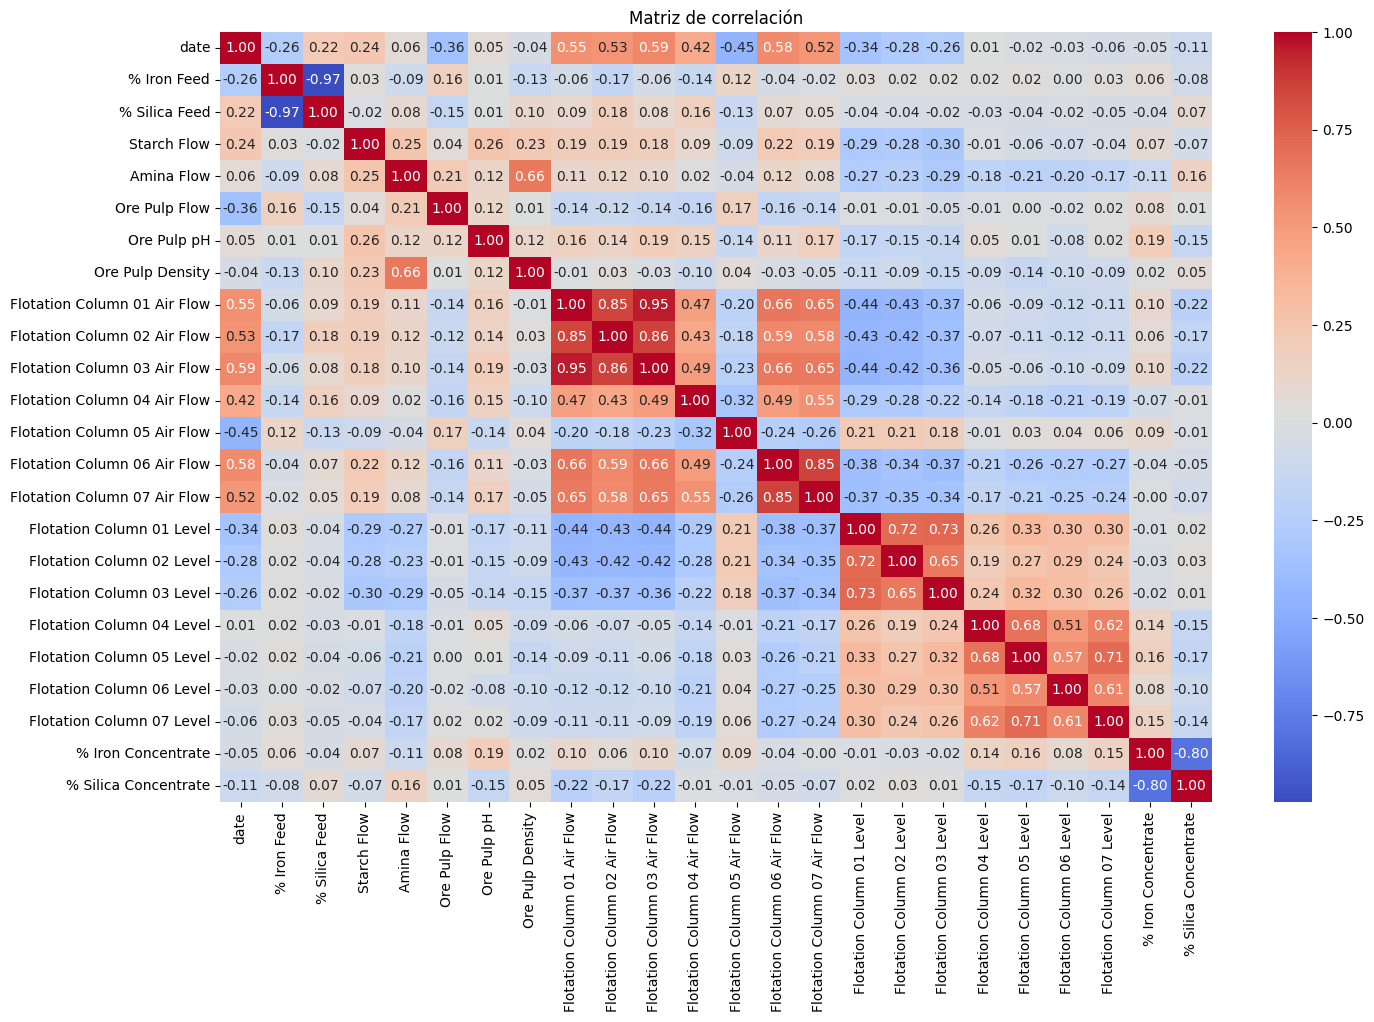

In [ ]:
# Análisis de la correlación entre las variables numéricas
plt.figure(figsize=(16, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

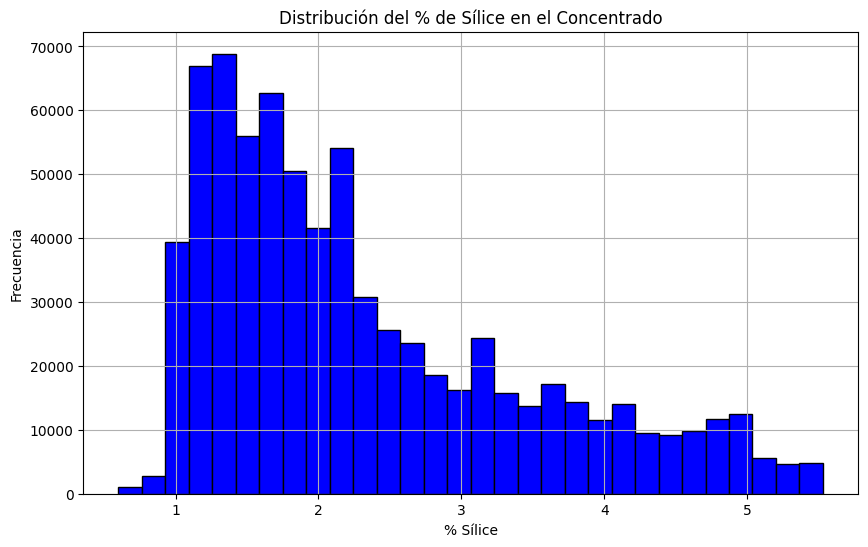

In [ ]:
# Histograma de la variable objetivo (porcentaje de sílice)
plt.figure(figsize=(10, 6))
df['% Silica Concentrate'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Distribución del % de Sílice en el Concentrado')
plt.xlabel('% Sílice')
plt.ylabel('Frecuencia')
plt.show()


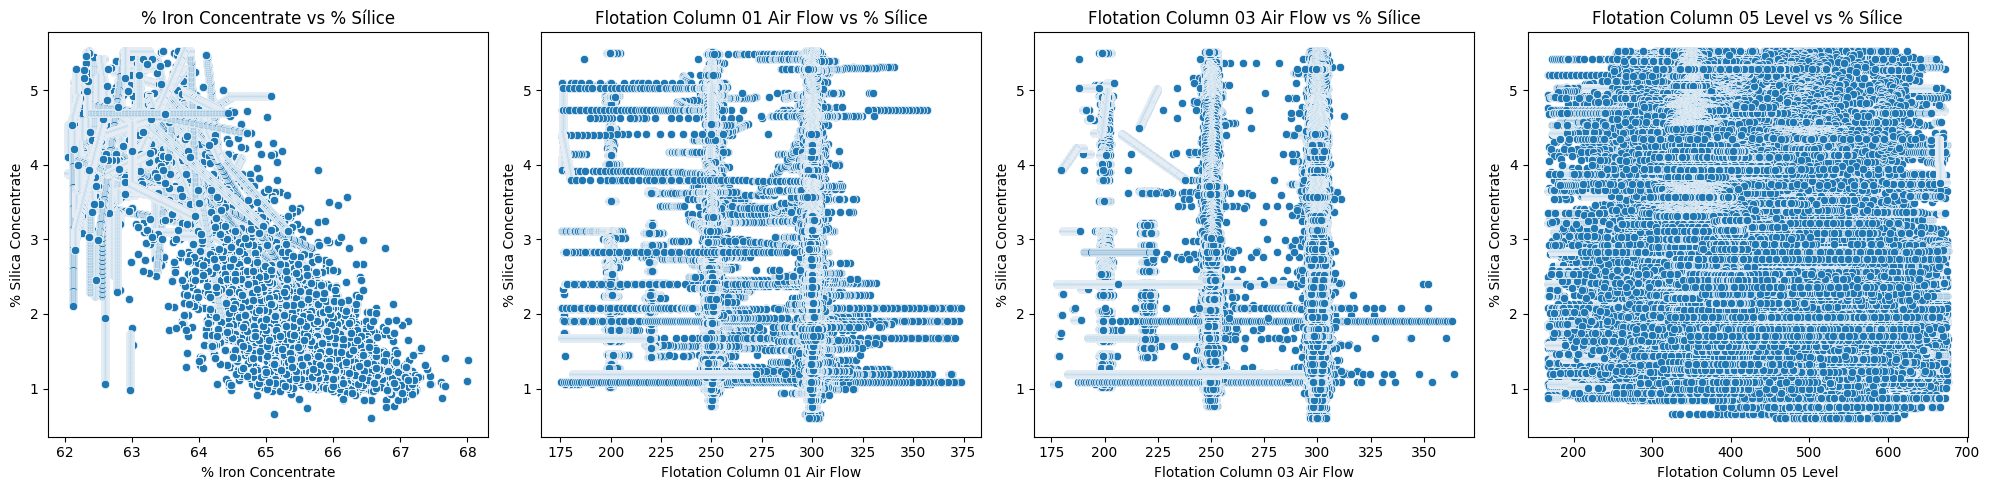

In [ ]:
# Gráficos de dispersión entre las variables más correlacionadas con el % de sílice
most_correlated = correlation_matrix['% Silica Concentrate'].abs().sort_values(ascending=False).index[1:5]
plt.figure(figsize=(20, 5))
for i, col in enumerate(most_correlated, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df, x=col, y='% Silica Concentrate')
    plt.title(f'{col} vs % Sílice')
plt.tight_layout()
plt.show()

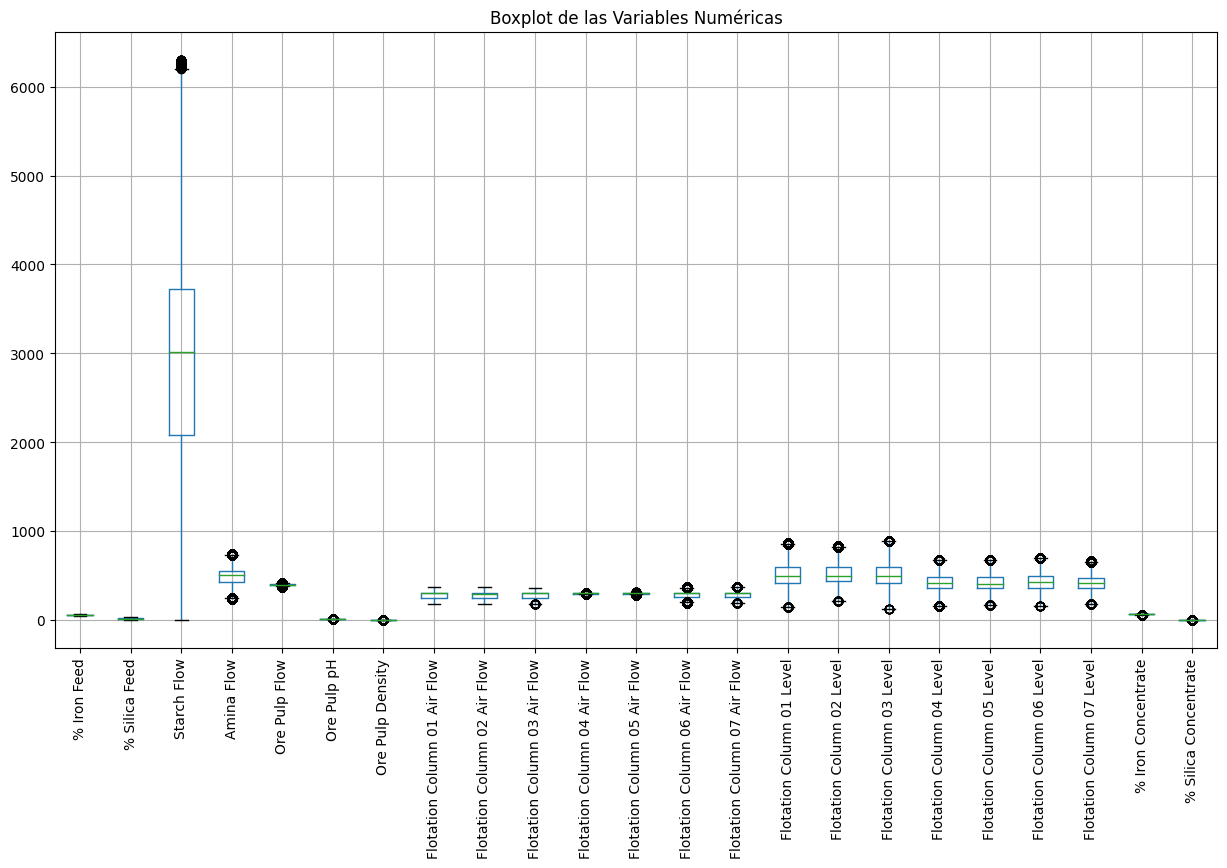

In [ ]:
# Boxplot para analizar la distribución de las variables numéricas
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title('Boxplot de las Variables Numéricas')
plt.show()

# outliers

In [ ]:
# Excluir la columna "date" del análisis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col != 'date']

In [ ]:
# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detectar outliers en las columnas numéricas, excluyendo "date"
outliers_dict = {}
for column in numeric_columns:
    outliers_dict[column] = detect_outliers_iqr(df[column])
    num_outliers = outliers_dict[column].sum()
    print(f'{column}: {num_outliers} outliers encontrados')

% Iron Feed: 0 outliers encontrados
% Silica Feed: 0 outliers encontrados
Starch Flow: 1137 outliers encontrados
Amina Flow: 8627 outliers encontrados
Ore Pulp Flow: 109043 outliers encontrados
Ore Pulp pH: 11002 outliers encontrados
Ore Pulp Density: 43058 outliers encontrados
Flotation Column 01 Air Flow: 0 outliers encontrados
Flotation Column 02 Air Flow: 0 outliers encontrados
Flotation Column 03 Air Flow: 33 outliers encontrados
Flotation Column 04 Air Flow: 54191 outliers encontrados
Flotation Column 05 Air Flow: 29474 outliers encontrados
Flotation Column 06 Air Flow: 9432 outliers encontrados
Flotation Column 07 Air Flow: 276 outliers encontrados
Flotation Column 01 Level: 854 outliers encontrados
Flotation Column 02 Level: 1564 outliers encontrados
Flotation Column 03 Level: 531 outliers encontrados
Flotation Column 04 Level: 462 outliers encontrados
Flotation Column 05 Level: 236 outliers encontrados
Flotation Column 06 Level: 2740 outliers encontrados
Flotation Column 07 Le

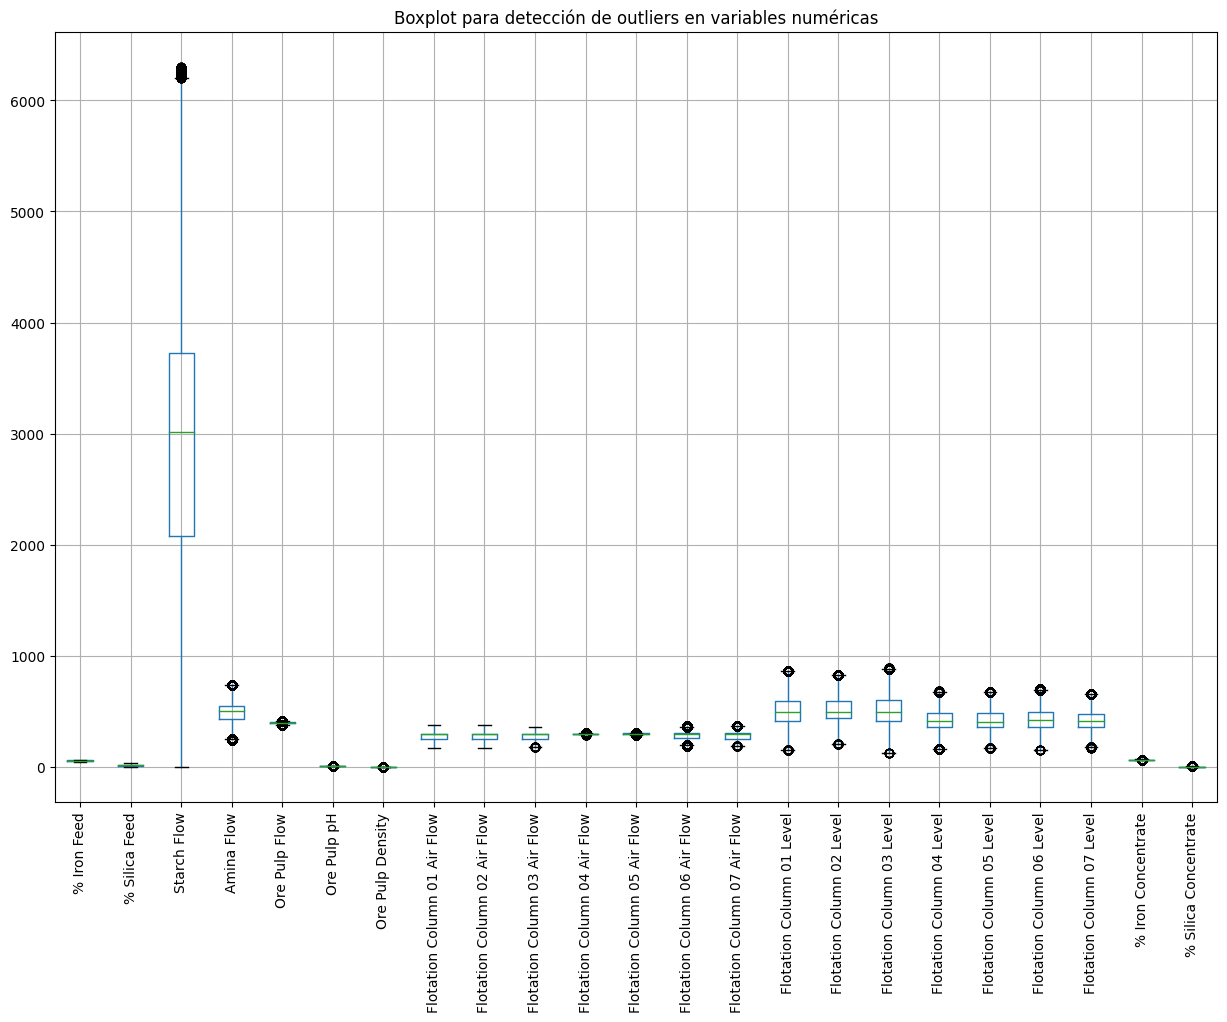

In [ ]:
# Visualización de outliers con boxplots para cada variable numérica, excluyendo "date"
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot(rot=90)
plt.title('Boxplot para detección de outliers en variables numéricas')
plt.show()

In [ ]:
# Mostrar registros que contienen al menos un outlier
outlier_rows = df.loc[pd.DataFrame(outliers_dict).any(axis=1)]
print("\nRegistros con al menos un outlier:")
print(outlier_rows)


Registros con al menos un outlier:
                      date  % Iron Feed  % Silica Feed  Starch Flow  \
1452   2017-03-10 09:00:00        54.95          17.40      3599.61   
2656   2017-03-10 15:00:00        54.95          17.40      5545.12   
2985   2017-03-10 17:00:00        55.99          17.16      5604.30   
3235   2017-03-10 19:00:00        55.99          17.16      5481.05   
3453   2017-03-10 20:00:00        55.99          17.16      5253.71   
...                    ...          ...            ...          ...   
737435 2017-09-09 23:00:00        49.75          23.20      3093.53   
737436 2017-09-09 23:00:00        49.75          23.20      3015.36   
737437 2017-09-09 23:00:00        49.75          23.20      2998.83   
737438 2017-09-09 23:00:00        49.75          23.20      2983.52   
737446 2017-09-09 23:00:00        49.75          23.20      2688.37   

        Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
1452       589.600     418.359000     10.05

SE ENCONTRARON REGISTROS ATIPICOS, PERO SON CANTIDADES IRRELEBANTES QUE NO AFECTARAN AL MODELO

In [ ]:
#df.to_csv('MiningProcess_Flotation.csv', index=False)

# Modelado

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar y preparar el dataset
df_modelado = pd.read_csv('MiningProcess_Flotation.csv')
df_modelado = df_modelado.drop_duplicates()

# Muestreo aleatorio del 10% del dataset
df_modelado = df_modelado.sample(frac=0.1, random_state=42)

# Eliminar la fecha
df_modelado.drop('date', axis=1, inplace=True)

X = df_modelado.select_dtypes(include=['float64', 'int64'])
y = df_modelado['% Silica Concentrate']
y_class = pd.cut(df_modelado['% Silica Concentrate'], bins=[0, 1.0, 2.5, float('inf')], labels=[0, 1, 2])
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelado Random Forest


In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_class)
y_pred_proba = clf.predict_proba(X_test_scaled)

# Validacion según area bajo la curva

AUC (Random Forest Classifier): 1.0


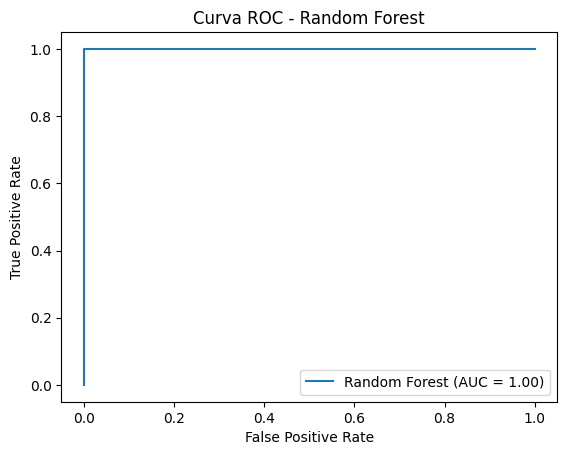

In [ ]:
# Calcular el AUC para clasificación multiclase usando el método 'ovr' (One-vs-Rest)
auc_clf = roc_auc_score(y_test_class, y_pred_proba, multi_class='ovr')
print(f'AUC (Random Forest Classifier): {auc_clf}')

fpr, tpr, _ = roc_curve(y_test_class, y_pred_proba[:, 1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_clf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


# Datos escalados para los demas modelos supervisados

In [ ]:
# Dividir el dataset en conjunto de entrenamiento y prueba para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamiento de variables para regresión
X_train_scaled_reg = scaler.fit_transform(X_train_reg)
X_test_scaled_reg = scaler.transform(X_test_reg)


## Modelo de Regresión Lineal

In [ ]:
reg_model = LinearRegression()
reg_model.fit(X_train_scaled_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_scaled_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)

## Modelo Super Vector Regression

In [ ]:
svr = SVR()
svr.fit(X_train_scaled_reg, y_train_reg)
y_pred_svr = svr.predict(X_test_scaled_reg)
mse_svr = mean_squared_error(y_test_reg, y_pred_svr)

## Modelo de Regresióm de Gradiente

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled_reg, y_train_reg)
y_pred_gbr = gbr.predict(X_test_scaled_reg)
mse_gbr = mean_squared_error(y_test_reg, y_pred_gbr)

## Modelo KNN

In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled_reg, y_train_reg)
y_pred_knn = knn.predict(X_test_scaled_reg)
mse_knn = mean_squared_error(y_test_reg, y_pred_knn)

# Evaluamos los modelos


In [ ]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'SVR', 'Gradient Boosting', 'KNN'],
    'MSE': [mse_reg, mse_svr, mse_gbr, mse_knn]
})
print(results)

              Modelo           MSE
0   Regresión Lineal  4.959719e-29
1                SVR  3.541782e-03
2  Gradient Boosting  5.672114e-05
3                KNN  2.736576e-02


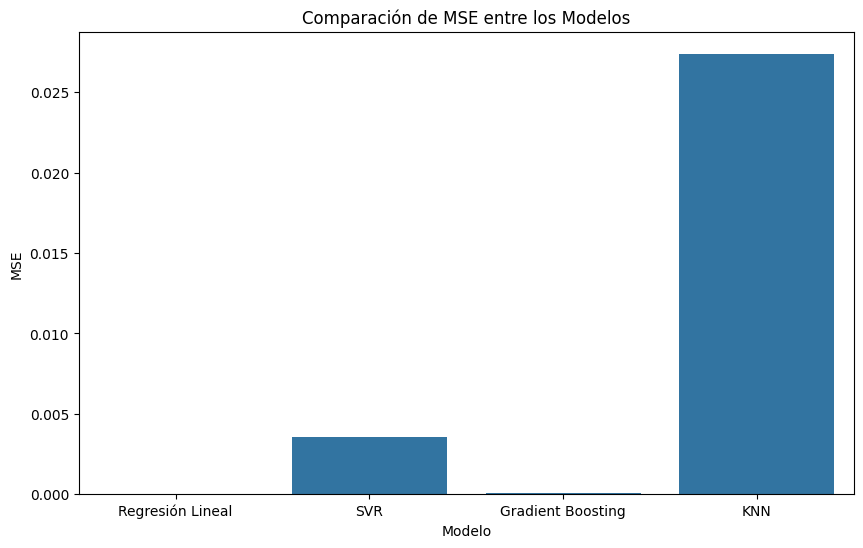

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='MSE', data=results)
plt.title('Comparación de MSE entre los Modelos')
plt.show()

# Conclusiones

1. Predicción en Tiempo Real: Dado que la medición del porcentaje de sílice es un proceso que tarda aproximadamente una hora, implementar un modelo predictivo en tiempo real podría ser una solución clave. Este modelo permitiría a los ingenieros ajustar las condiciones operativas de manera proactiva y mejorar la consistencia del proceso. El desarrollo de este modelo reducirá la dependencia de los resultados de laboratorio y permitirá a la planta operar de manera más eficiente.

2.   
Optimización del Proceso: Un modelo predictivo robusto ayudaría a optimizar el proceso de flotación al ajustar las condiciones en función de las predicciones en tiempo real. Esto, a su vez, permitiría mantener el contenido de sílice dentro de los límites de calidad exigidos por el mercado, asegurando un producto final competitivo.

3. Reducción de Costos Operativos: Al predecir el porcentaje de sílice con precisión, la planta podría reducir el uso excesivo de reactivos y energía, que son empleados para corregir las condiciones de flotación cuando los niveles de sílice no cumplen con los estándares. Así, los costos operativos se reducirían considerablemente, mejorando la rentabilidad del proceso.

4. Mejora de la Eficiencia: El modelo predictivo ofrecería la posibilidad de hacer ajustes operativos más precisos y en tiempo real, lo que podría mantener la eficiencia del proceso en niveles óptimos. Esto llevaría a una mayor producción de concentrado de mineral de hierro de alta calidad y una menor variabilidad en los resultados.

5. Estrategia a Largo Plazo: La implementación de un modelo de predicción de sílice no solo mejora el desempeño a corto plazo, sino que también permite una mejor planificación a largo plazo. Con la capacidad de anticipar el comportamiento del proceso, la planta podría ajustar sus operaciones en función de las predicciones futuras y optimizar la planificación de producción.

